# Введение в анализ данных
## НИУ ВШЭ, 2019-2020 учебный год

### Домашнее задание №5

Задание выполнил(а): (впишите свои фамилию и имя)

### Общая информация

__Дата выдачи:__ 04.06.2020

__Дедлайн:__ 23:59 11.06.2020


### Оценивание и штрафы

За домашнее задание можно получить __2__ бонусных балла, которые можно использовать для улучшения вторичных баллов за домашки и проверочные (то есть напрямую, если за какую-то домашку у вас __6/10__, а в этой работе вы набрали __2__ балла, то вы можете их в ту домашку и за нее будет __8__ баллов). 

Сдать после срока домашнее задание нельзя! 

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-4: zG1cIyT

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

# K-means своими руками (1 балл)

In [1]:
import pandas 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np
from IPython.display import clear_output

In [2]:
X1 = np.random.randn(1000,2)
X2 = np.random.randn(1000,2) - np.array([10,1])
X3 = np.random.randn(1000,2) - np.array([1,10])
X = np.vstack((X1,X2,X3))
y = np.array([1]*1000 + [2]*1000 + [3]*1000)

In [ ]:
y = np.array([1]*1000 + [2]*1000 + [3]*1000)

Визуализируем точки:

In [39]:
X1 = np.random.normal(-3, 5, (1000,2))
X2 = np.random.normal(20, 5, (1000,2))
X3 = np.random.normal(-20, 5, (1000,2))
X = np.vstack((X1,X2,X3))
y = np.array([1]*1000 + [2]*1000 + [3]*1000)

In [44]:
X1 = np.linspace(-3, 5, 1000)
X2 = np.linspace(0, 3, 1000)

Y1 = np.cos(X1) + np.random.normal(0, 0.3, size=1000)
#Y2 = np.sin(X2) #+ np.random.normal(0, 0.5, size=1000)

X = np.vstack((X1, Y1))
#xy2 = np.vstack((X2, Y2))
#X = np.hstack((xy1,xy2))

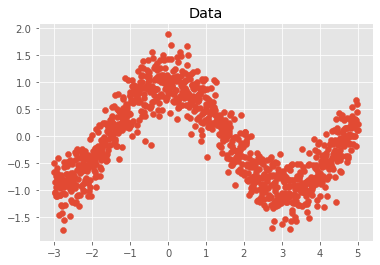

In [45]:
plt.scatter(X[0], X[1])
plt.title('Data')
plt.show()

In [36]:
def euclidian_metric(X, x):
    distances = np.sqrt(np.sum((X - x)**2, axis=1))
    return distances

In [46]:
y = np.random.randint(0, 3, size=X.shape[0])
centers = [0] * 3
for i in range(3):
    idx = np.where(y == i)[0]
    centers[i] = np.sum(X[idx], axis=0) / len(idx)
np.array(centers)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-1.74647028, -1.83054783, -1.91759528, ...,  2.71986965,
         2.6118514 ,  2.56153593],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [47]:
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE

In [48]:
class k_means:
    def __init__(self, n_clusters, max_iter, visualize=False):
        # гиперпараметр - количество кластеров
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.visualize = visualize
        self.transformer = TSNE(n_components=2)
        
    def fit(self, X):
        """
        X - выборка размера количество объектов x количество признаков
        max_iter - максимальное число итераций
        visualize - визуализировать точки ("карту") на каждой итерации 
        """
        # Цель: обучить центры кластеров self.centers, форма: число кластеров x число признаков
        
        # Шаг 0: сколько объектов и признаков?
        num_obj = X.shape[0]
        num_feat = X.shape[1] 
        
        # Шаг 1.1: инициализируйте y - вектор длины число объектов, 
        # хранящий, к какому кластеру относится каждый объект
        # каждый элемент - случайно выбранный номер кластера 
        y = np.random.randint(0, self.n_clusters, size=num_obj)
        
        # Шаг 1.2: создайте матрицу для хранения центров кластеров
        self.centers = [0] * self.n_clusters
        if num_feat > 2:
           X_tsne = self.transformer.fit_transform(X)

        for j in range(self.max_iter):
            # Шаг 2: обновите центры кластеров
            # your code here 
            for i in range(self.n_clusters):
                idx = np.where(y == i)[0]
                self.centers[i] = np.sum(X[idx], axis=0) / len(idx)

            # Шаг 3: обновите y. Для этого вычислите расстояния между всеми объектами 
            # и центрами кластеров (используйте pairwise_distances), 
            # затем найдите ближайший к каждому объекту кластер
            
            for i in range(num_obj):
                elem = X[i]
                cluster = np.argmin(euclidian_metric(self.centers, elem))
                y[i] = cluster
            
            # Поддержка флага visualize
            # your code here 
            if self.visualize:

                if num_feat > 2:
                    X_tr = X_tsne
                else:
                    X_tr = X
                    
                if j==0:
                   status = "Before clustering"
                elif j==self.max_iter-1:
                   status = "After clustering"
                else:
                   status = "Clusteing..."

                clear_output(wait=True)
                plt.figure(figsize= (5,5))
                plt.scatter(X_tr[:, 1], X_tr[:, 0], c=y)
                plt.title(status)
                plt.show()
        self.y = y
    
    def transform(self, X):
        """
        X - выборка размера (количество объектов x количество признаков)
        """
        # Цель: вернуть y - номера кластеров, к которым относится каждый объект
        # вектор длины число объектов в X
        return self.y

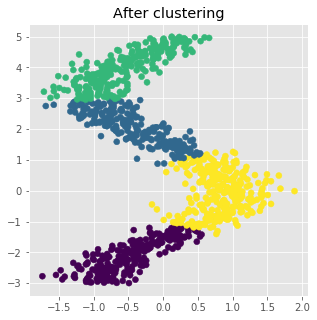

In [50]:
cls = k_means(n_clusters=4, max_iter=10, visualize=True)
cls.fit(X.T)# visualize=True выводит график на каждой итерации
y = cls.transform(X.T)

Итоговая кластеризация:

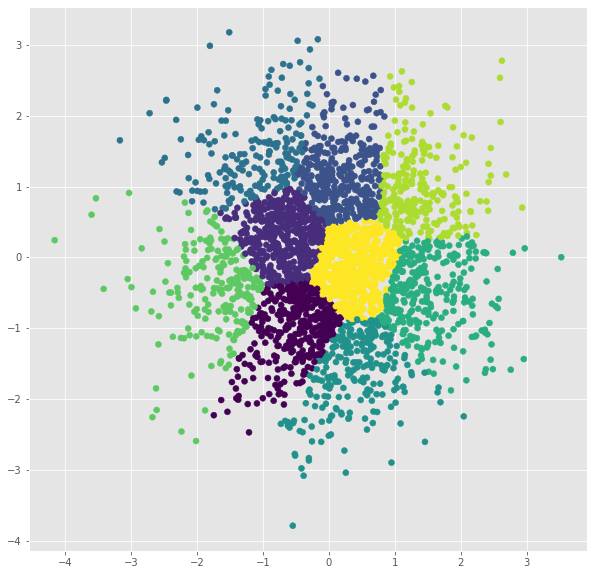

In [33]:
plt.figure(figsize= (10,10))
plt.scatter(X[:,0], X[:,1], c=y)

# Кластеризация цифр (1 балл)

Кластеризуйте изображения цифр. В этом задании, в отличие от предыдущего, одна картинка - это один объект (в предыдущем задании один пиксель - один объект).

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
data = digits["data"]
target = digits["target"]


Число объектов и признаков:

In [7]:
data.shape

(1797, 64)

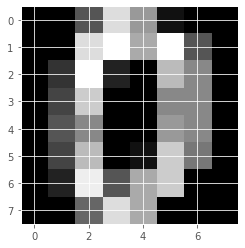

In [10]:
# Каждый объект - изображение цифры размеров 8 x 8
plt.imshow(data[0].reshape(8, 8), cmap="gray")

Задание:
1. Кластеризуйте цифры методами кластеризации k-means и DBSCAN. 
2. Для k-means визуализируйте картинки - центры кластеров.
3. Для DBSCAN выведите случайно выбранные 3 картинки из каждого кластера.

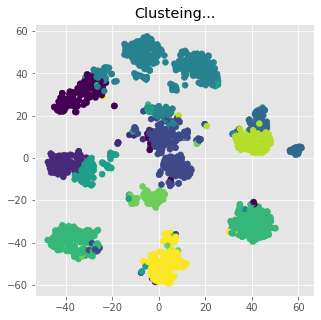

In [46]:
kmeans = k_means(n_clusters=10, max_iter=100, visualize=True)
kmeans.fit(data)
y = kmeans.transform(data)

In [50]:
from sklearn.manifold import TSNE
tsne = TSNE()
X = tsne.fit_transform(data)

No handles with labels found to put in legend.


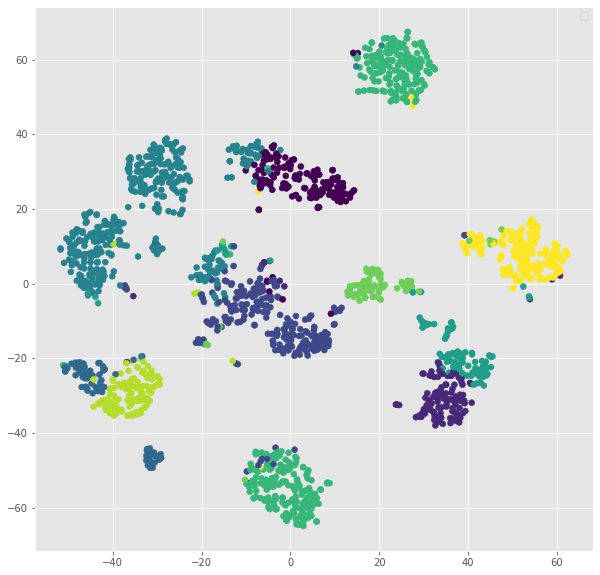

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y)
plt.legend()
plt.show()